# CS:GO Winner Predictor Using Nade Data

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import plot_tree
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv(r'C:/Users/howle/OneDrive/Documents/mm_grenades_demos.csv')

In [3]:
print(df.shape)

(366098, 33)


In [4]:
df.groupby('map').count()

,Unnamed: 0,file,round,start_seconds,seconds,end_seconds,att_team,vic_team,att_id,vic_id,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,bomb_site,hitbox,nade,winner_team,winner_side,att_rank,vic_rank,att_pos_x,att_pos_y,nade_land_x,nade_land_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
map,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cs_agency,888,888,888,888,888,888,888,193,888,193,888,193,888,888,888,0,193,888,888,888,888,193,888,888,888,888,193,193,888,888,888,888
cs_assault,291,291,291,291,291,291,291,24,291,24,291,24,291,291,291,0,24,291,291,291,291,24,291,291,291,291,24,24,291,291,291,291
cs_insertion,91,91,91,91,91,91,91,7,91,7,91,7,91,91,91,0,7,91,91,91,91,7,91,91,91,91,7,7,91,91,91,91
cs_italy,612,612,612,612,612,612,612,92,612,92,612,92,612,612,612,0,92,612,612,612,612,92,612,612,612,612,92,92,612,612,612,612
cs_office,1698,1698,1698,1698,1698,1698,1698,417,1698,417,1698,417,1698,1698,1698,0,417,1698,1698,1698,1698,417,1698,1698,1698,1698,417,417,1698,1698,1698,1698
de_austria,452,452,452,452,452,452,452,63,452,63,452,63,452,452,452,60,63,452,452,452,452,63,452,452,452,452,63,63,452,452,452,452
de_aztec,190,190,190,190,190,190,190,50,190,50,190,50,190,190,190,0,50,190,190,190,190,50,190,190,190,190,50,50,190,190,190,190
de_blackgold,119,119,119,119,119,119,119,5,119,5,119,5,119,119,119,3,5,119,119,119,119,5,119,119,119,119,5,5,119,119,119,119
de_cache,70687,70687,70687,70687,70687,70687,70687,9387,70687,9387,70687,9387,70687,70687,70687,5048,9387,70687,70687,70687,70687,9387,70687,70687,70687,70687,9387,9387,70687,70687,70687,70687


## Filtering to Isolate Dust 2 Map

In [5]:
is_dust2 = df['map'] == 'de_dust2'

dust2 = df[is_dust2]

dust2.shape

(85742, 33)

In [6]:
dust2.iloc[0:5,:]

,Unnamed: 0,file,map,round,start_seconds,seconds,end_seconds,att_team,vic_team,att_id,vic_id,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,bomb_site,hitbox,nade,winner_team,winner_side,att_rank,vic_rank,att_pos_x,att_pos_y,nade_land_x,nade_land_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,0,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,125.1816,197.6025,Team 2,NaN,76561198244806730,NaN,Terrorist,NaN,0,0,False,NaN,NaN,Decoy,Team 1,CounterTerrorist,13,NaN,-918.1018,-856.1255,257.32770,-435.8516,NaN,NaN,PISTOL_ROUND,2950,3850,16.0
1,1,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,139.1844,197.6025,Team 2,NaN,76561198051040004,NaN,Terrorist,NaN,0,0,False,NaN,NaN,Decoy,Team 1,CounterTerrorist,17,NaN,-1310.6070,1145.8650,-1124.67500,1216.9330,NaN,NaN,PISTOL_ROUND,2950,3850,16.0
2,2,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,166.0649,197.6025,Team 2,Team 2,76561198147933469,7.656120e+16,Terrorist,Terrorist,36,0,False,NaN,Generic,HE,Team 1,CounterTerrorist,18,18.0,-180.6393,327.6691,-89.53781,318.2151,-130.1585,304.0313,PISTOL_ROUND,2950,3850,16.0
3,3,003201673717864202280_0171883906.dem,de_dust2,2,197.6025,213.0431,281.2757,Team 1,NaN,76561198051106390,NaN,CounterTerrorist,NaN,0,0,False,NaN,NaN,Smoke,Team 2,Terrorist,16,NaN,151.3117,2304.8010,-431.48370,2126.3900,NaN,NaN,ECO,12400,4700,16.0
4,4,003201673717864202280_0171883906.dem,de_dust2,2,197.6025,220.8572,281.2757,Team 1,NaN,76561198051106390,NaN,CounterTerrorist,NaN,0,0,False,NaN,NaN,HE,Team 2,Terrorist,16,NaN,-1669.9540,2197.1340,-1955.98500,1384.2130,NaN,NaN,ECO,12400,4700,16.0


## Trimming Columns 

In [7]:
new_df = dust2[['winner_side', 'round', 'round_type', 'att_side', 'is_bomb_planted', 'nade', 'ct_eq_val', \
                't_eq_val', 'att_pos_x', 'att_pos_y', 'nade_land_x', 'nade_land_y', \
               'hp_dmg', 'arm_dmg']]

new_df

,winner_side,round,round_type,att_side,is_bomb_planted,nade,ct_eq_val,t_eq_val,att_pos_x,att_pos_y,nade_land_x,nade_land_y,hp_dmg,arm_dmg
0,CounterTerrorist,1,PISTOL_ROUND,Terrorist,False,Decoy,2950,3850,-918.1018,-856.1255,257.32770,-435.8516,0,0
1,CounterTerrorist,1,PISTOL_ROUND,Terrorist,False,Decoy,2950,3850,-1310.6070,1145.8650,-1124.67500,1216.9330,0,0
2,CounterTerrorist,1,PISTOL_ROUND,Terrorist,False,HE,2950,3850,-180.6393,327.6691,-89.53781,318.2151,36,0
3,Terrorist,2,ECO,CounterTerrorist,False,Smoke,12400,4700,151.3117,2304.8010,-431.48370,2126.3900,0,0
4,Terrorist,2,ECO,CounterTerrorist,False,HE,12400,4700,-1669.9540,2197.1340,-1955.98500,1384.2130,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365817,CounterTerrorist,30,NORMAL,Terrorist,False,HE,21000,26800,629.4424,1111.5940,1690.24100,526.3024,0,0
365818,CounterTerrorist,30,NORMAL,CounterTerrorist,False,Smoke,21000,26800,1409.3760,583.5529,668.46130,1102.1630,0,0
365819,CounterTerrorist,30,NORMAL,Terrorist,False,Molotov,21000,26800,680.1351,1028.6170,1284.19800,313.6260,0,0
365820,CounterTerrorist,30,NORMAL,CounterTerrorist,False,Flash,21000,26800,1399.6700,1879.4100,1206.21500,704.8824,0,0


## Mapping/One hot Encoding the Predictors

In [8]:
encoded_nades = pd.get_dummies(new_df.nade, prefix='nade_')

df = new_df.join(encoded_nades)

encoded_nades


,nade__Decoy,nade__Flash,nade__HE,nade__Incendiary,nade__Molotov,nade__Smoke
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,0,1
4,0,0,1,0,0,0
...,...,...,...,...,...,...
365817,0,0,1,0,0,0
365818,0,0,0,0,0,1
365819,0,0,0,0,1,0
365820,0,1,0,0,0,0


In [9]:
encoded_attacker = pd.get_dummies(new_df.att_side, prefix='attacker_')

df = df.join(encoded_attacker)

encoded_attacker

,attacker__CounterTerrorist,attacker__Terrorist
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
365817,0,1
365818,1,0
365819,0,1
365820,1,0


In [10]:
encoded_round_type = pd.get_dummies(new_df.round_type, prefix='round_type_')

df = df.join(encoded_round_type)

encoded_round_type

,round_type__ECO,round_type__FORCE_BUY,round_type__NORMAL,round_type__PISTOL_ROUND,round_type__SEMI_ECO
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
365817,0,0,1,0,0
365818,0,0,1,0,0
365819,0,0,1,0,0
365820,0,0,1,0,0


In [11]:
encoded_bomb_plant = pd.get_dummies(new_df.is_bomb_planted, prefix='bomb_planted_')

df = df.join(encoded_bomb_plant)

encoded_bomb_plant

,bomb_planted__False,bomb_planted__True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
365817,1,0
365818,1,0
365819,1,0
365820,1,0


In [12]:
encoded_round_number = pd.get_dummies(new_df.round, prefix='round_number_')

df = df.join(encoded_round_number)

encoded_round_number

TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

#### Dropping the original non-encoded predictor columns

In [13]:
df = df.drop(['att_side', 'nade', 'round_type', 'is_bomb_planted', 'round'], axis= 1)

df

,winner_side,ct_eq_val,t_eq_val,att_pos_x,att_pos_y,nade_land_x,nade_land_y,hp_dmg,arm_dmg,nade__Decoy,nade__Flash,nade__HE,nade__Incendiary,nade__Molotov,nade__Smoke,attacker__CounterTerrorist,attacker__Terrorist,round_type__ECO,round_type__FORCE_BUY,round_type__NORMAL,round_type__PISTOL_ROUND,round_type__SEMI_ECO,bomb_planted__False,bomb_planted__True
0,CounterTerrorist,2950,3850,-918.1018,-856.1255,257.32770,-435.8516,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
1,CounterTerrorist,2950,3850,-1310.6070,1145.8650,-1124.67500,1216.9330,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,CounterTerrorist,2950,3850,-180.6393,327.6691,-89.53781,318.2151,36,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
3,Terrorist,12400,4700,151.3117,2304.8010,-431.48370,2126.3900,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0
4,Terrorist,12400,4700,-1669.9540,2197.1340,-1955.98500,1384.2130,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365817,CounterTerrorist,21000,26800,629.4424,1111.5940,1690.24100,526.3024,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
365818,CounterTerrorist,21000,26800,1409.3760,583.5529,668.46130,1102.1630,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0
365819,CounterTerrorist,21000,26800,680.1351,1028.6170,1284.19800,313.6260,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
365820,CounterTerrorist,21000,26800,1399.6700,1879.4100,1206.21500,704.8824,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0


## Encoding The Reponse

In [14]:
y_encode = {'CounterTerrorist':0, 'Terrorist':1}

enc_winner = df['winner_side'].map(y_encode)

df.insert(loc=0, column='winner_encoded', value=enc_winner)

df

,winner_encoded,winner_side,ct_eq_val,t_eq_val,att_pos_x,att_pos_y,nade_land_x,nade_land_y,hp_dmg,arm_dmg,nade__Decoy,nade__Flash,nade__HE,nade__Incendiary,nade__Molotov,nade__Smoke,attacker__CounterTerrorist,attacker__Terrorist,round_type__ECO,round_type__FORCE_BUY,round_type__NORMAL,round_type__PISTOL_ROUND,round_type__SEMI_ECO,bomb_planted__False,bomb_planted__True
0,0,CounterTerrorist,2950,3850,-918.1018,-856.1255,257.32770,-435.8516,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
1,0,CounterTerrorist,2950,3850,-1310.6070,1145.8650,-1124.67500,1216.9330,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0,CounterTerrorist,2950,3850,-180.6393,327.6691,-89.53781,318.2151,36,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
3,1,Terrorist,12400,4700,151.3117,2304.8010,-431.48370,2126.3900,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0
4,1,Terrorist,12400,4700,-1669.9540,2197.1340,-1955.98500,1384.2130,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365817,0,CounterTerrorist,21000,26800,629.4424,1111.5940,1690.24100,526.3024,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
365818,0,CounterTerrorist,21000,26800,1409.3760,583.5529,668.46130,1102.1630,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0
365819,0,CounterTerrorist,21000,26800,680.1351,1028.6170,1284.19800,313.6260,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
365820,0,CounterTerrorist,21000,26800,1399.6700,1879.4100,1206.21500,704.8824,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0


## Splitting into Test and Train Sets

In [15]:
split_sets = np.random.rand(len(df)) < 0.8

train_df = df[split_sets]

test_df = df[~split_sets]

#### 80% Train, 20% Test

In [ ]:
print(train_df.shape)

print(test_df.shape)

#### Predictors and Response Sets

In [16]:
X_train = train_df.iloc[:,2:]
y_train = train_df.iloc[:,0]

X_test = test_df.iloc[:,2:]
y_test = test_df.iloc[:,0]

## Random Forest Model

In [17]:
# model = RandomForestClassifier(n_estimators=100, max_depth= None, min_samples_split=5)
# cvs = cross_val_score(model, X_train, y_train, cv = 5)

# cv = sum(cvs)/len(cvs)
# print(f'Cross Validation Score: {cv}\n\n')

### Validation of Random Forest

In [197]:
model = RandomForestClassifier(max_features=None,\
                               n_estimators=500, max_depth= None,\
                               min_samples_split=2, criterion='gini',\
                               max_leaf_nodes=None).fit(X_train,y_train)

predictions = model.predict(X_test)

score = round((100*accuracy_score(y_test, predictions)), 2)

print(f'Test accuracy: {score}%')

Test accuracy: 95.53%


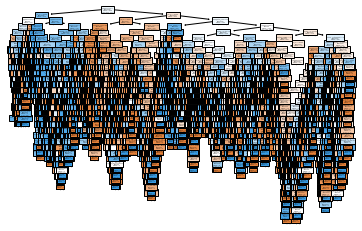

In [199]:
# _ = tree.plot_tree(model.estimators_[0], feature_names=X_train.columns, filled=True)